In [1]:
import pandas as pd
import numpy as np

In [ ]:
SVC()

# FOREST HEALTH UK #

### Importing the data

In [2]:
#importing the data
df = pd.read_csv('/Users/sandra/Desktop/Capstone/EDA_forest.csv')
df.head()

,year,species,plot_type,assessment_type,plot_number,subplot,tree_number,local_crown_density,diameter_mm,height_cm,...,ammonia,nitrous_oxide,sulphur_dioxide,volatile_organic_compounds,particulate_matter_10,particulate_matter_25,ann_rainfall,ann_temperature,age,mean_col
0,1995,OK,OK,I,1,N,1,15.0,875.0,0.0,...,96.000094,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236
1,1995,OK,OK,I,1,N,2,25.0,517.0,0.0,...,96.000094,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236
2,1995,OK,OK,I,1,N,3,15.0,673.0,0.0,...,96.000094,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236
3,1995,OK,OK,I,1,N,4,10.0,621.0,0.0,...,96.000094,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236
4,1995,OK,OK,I,1,N,5,25.0,1020.0,0.0,...,96.000094,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236


In [3]:
#creating crown mean variable - this will be used for feture importance code
crown_mean = np.mean(df['mean_col'])
crown_mean

21.225572722425014

In [4]:
#creating crown density binary class
df['Crown_density_class'] = [1 if i > crown_mean else 0 for i in df.local_crown_density]
df.head()

,year,species,plot_type,assessment_type,plot_number,subplot,tree_number,local_crown_density,diameter_mm,height_cm,...,nitrous_oxide,sulphur_dioxide,volatile_organic_compounds,particulate_matter_10,particulate_matter_25,ann_rainfall,ann_temperature,age,mean_col,Crown_density_class
0,1995,OK,OK,I,1,N,1,15.0,875.0,0.0,...,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236,0
1,1995,OK,OK,I,1,N,2,25.0,517.0,0.0,...,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236,1
2,1995,OK,OK,I,1,N,3,15.0,673.0,0.0,...,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236,0
3,1995,OK,OK,I,1,N,4,10.0,621.0,0.0,...,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236,0
4,1995,OK,OK,I,1,N,5,25.0,1020.0,0.0,...,86.45724,38.979309,93.290781,41.82557,34.350562,751.8,10.07,175,17.298236,1


In [5]:
df.shape

(46925, 65)

In [6]:
from scipy import stats
import statsmodels.api as sm
import pmdarima as pmd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# MODELING

In [8]:
df_copy = df.copy()

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [10]:
#target
y = df.Crown_density_class

In [11]:
#baseline
df.Crown_density_class.value_counts(normalize=True).max()

0.6209483217900905

### NLP - comments

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
#predictor
X1 = df.comments

In [14]:
X1.value_counts(ascending=False)

chin                                2087
pin                                 1699
el                                  1172
chin                                1168
tom                                 1040
                                    ... 
EL THIN CRWN                           1
POOR TOP                               1
nmdel                                  1
lm (slight) chin pin                   1
stand dead                             1
Name: comments, Length: 8098, dtype: int64

In [15]:
len(X1.unique())

8098

In [16]:
df.comments

0               CHIN             OMD
1               CHIN             OMD
2        CHIN ODD BROWN LVS+BLOTCHES
3               CHIN RECOVERING WELL
4             CHIN POSS SQUIRREL DAM
                    ...             
46920                            PIN
46921                         SQ OLD
46922                            PIN
46923                            PIN
46924                            PIN
Name: comments, Length: 46925, dtype: object

In [17]:
X1.shape

(46925,)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

tvec = TfidfVectorizer(
                                      max_df=1.0,
                                      max_features=10000,
                                      norm='l2', ngram_range=(1,2)
                                      )
a = tvec.fit_transform(X1)

In [19]:
cvec = CountVectorizer()
cvec.fit(X1)

CountVectorizer()

In [20]:
len(cvec.get_feature_names())

2335

In [21]:
#transforming X1 variable into df
X1_trans = pd.DataFrame(cvec.transform(X1).todense(), columns=cvec.get_feature_names())


In [22]:
#train test split
X1_train, X1_test, y_train, y_test = train_test_split(np.asmatrix(X1_trans), y, test_size=0.2,
                                                    random_state=1, stratify=y)

In [23]:
#checking how often each word appeared
word_counts = X1_trans.sum(axis=0)
word_counts.sort_values(ascending = False).head(10)

chin     15113
pin      12384
el        5490
lm        3340
tom       3235
old       2399
blm       2197
omd       1998
lam       1872
minor     1505
dtype: int64

In [24]:
#creating cvec_mat needed
cvec_mat = cvec.transform(X1)

In [25]:
# count word appearances
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count


In [26]:
csum = word_counter(cvec_mat)
csum

array([ 1,  1,  2, ...,  1, 11,  2])

In [27]:
# sort words by frequency
from operator import itemgetter


def word_frequency_sorter(words, counts):
    sort_result = sorted(zip(words, list(counts)),
                         key=itemgetter(1), reverse=True)
    return sort_result

In [28]:
# words occuring
words = cvec.get_feature_names()

In [29]:
df_word_frequency = pd.DataFrame(word_frequency_sorter(
    words, csum), columns=['word', 'frequency'])
df_word_frequency.set_index('word', inplace=True)
df_word_frequency.head(20)

,frequency
word,
chin,15113
pin,12384
el,5490
lm,3340
tom,3235
old,2399
blm,2197
omd,1998
lam,1872


In [30]:
df_cvec = pd.DataFrame(cvec_mat.toarray(), columns=cvec.get_feature_names())
df_cvec.sum(axis=0).sort_values(ascending=False)[:10]

chin     15113
pin      12384
el        5490
lm        3340
tom       3235
old       2399
blm       2197
omd       1998
lam       1872
minor     1505
dtype: int64

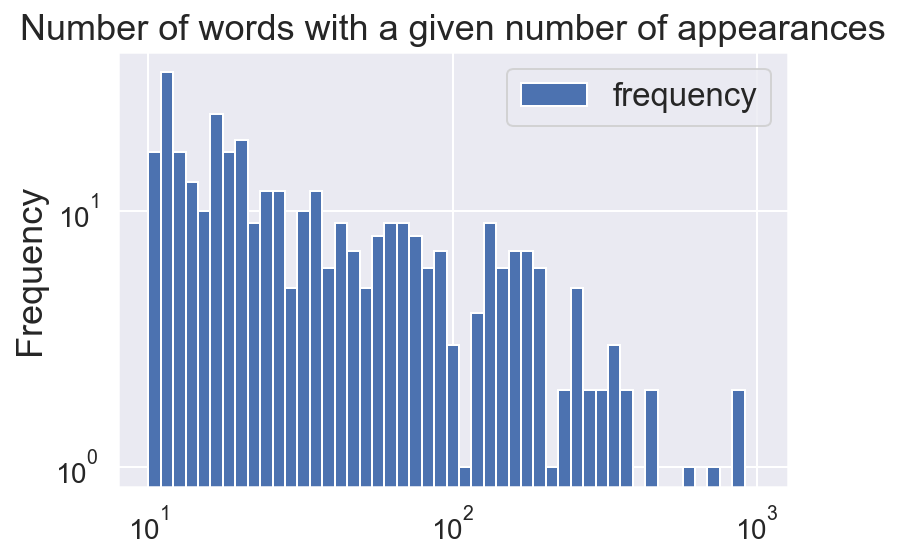

In [31]:
df_word_frequency.plot(kind='hist',
                       bins=np.logspace(1, 3, 50),
                       loglog=True,
                       title='Number of words with a given number of appearances',
                       fontsize=14)
plt.show()

X1_train = cvec_mat
y_train = df.Crown_density_class
X1_test = cvec.transform(X1)


### Applying Logistic regression and Random Forest Classifier 

In [32]:
# Import and fit our logistic regression and test it, too
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter = 1000)
lr.fit(X1_train, y_train)
print(lr.score(X1_train, y_train))
print(lr.score(X1_test, y_test))

0.6669952051145445
0.6616941928609483


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in range(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [34]:
docm(y_test, lr.predict(X1_test), labels=None)

,p_0,p_1
0,5385,443
1,2732,825


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score


In [36]:
rfc = RandomForestClassifier(200, random_state=1)
rfc.fit(X1_train, y_train)

rfc_pred = rfc.predict(X1_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))
print("Training Score:", rfc.score(X1_train,y_train))
print("Test Score:",rfc.score(X1_test,y_test))
s = cross_val_score(rfc, X1_test, y_test, cv=5, n_jobs=2)
print("Cross Validation Score:", s)
s = cross_val_score(rfc, X1_train, y_train, cv=5, n_jobs=2).mean()
print("Cross Validation Score mean:", s)

Accuracy Score: 0.661
Training Score: 0.7001065530101226
Test Score: 0.6605221097496005
Cross Validation Score: [0.65583378 0.63665424 0.64358018 0.6494406  0.64464571]
Cross Validation Score mean: 0.6485881726158763


Good scores on train, test, cv and accuracy scores suggesting the model used perforemed relatively well, as they were higher than the baseline. Accuracy in this model is 0.64, which means 64% of the data was classified correctly.This suggest model can be trusted

In [37]:
crown_density_mean = np.mean(df['local_crown_density'])
crown_density_mean

21.22557272242941

In [38]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X1_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']
#mean_col = df.groupby(['year', 'species'])['local_crown_density'].mean()
feature_means = []
for i in X1_trans.columns:
    feature_means.append(np.mean(df[df.comments.str.lower().str.contains(i)].local_crown_density))
feature_importances['crown_density_mean'] = feature_means
feature_importances['over_or_under'] = [1 if i > crown_density_mean else 0 for i in feature_importances.crown_density_mean]

feature_importances.sort_values('importance', ascending=False).head(20)

,feature,importance,crown_density_mean,over_or_under
1514,omd,0.031403,26.998035,1
532,chin,0.030429,21.662485,1
1593,pin,0.027840,19.162083,0
1231,lm,0.021494,17.225761,0
684,dead,0.018112,59.982935,1
391,blm,0.015295,16.822485,0
2278,wm,0.014787,25.476783,1
2085,top,0.013898,25.340659,1
1483,old,0.013638,22.800399,1
832,el,0.012208,22.675532,1


As the result of Random Forest Classifier and looking at the importance features, it is prominent that 'omd' is the most important feature of the model, which stands for old mechanical damage. According to analysis it cause almost 27% of local crown density reduction in trees. Just after omd there is chin(chewing insect), pin(pin holes), lm (leaf miner damage) and death causing 21.6%, 19.2%, 17.2%, 59.9% of local crown density reduction respectively. Of these highest important features, omd, chin and death are classifying tree as in bad health condition.


AC	Adelges cooleyi	
BBD	Beech bark disease	
BC	Beech coccus	
BLM	Beech leaf miner	
BT	Broken top	
CHIN	Chewing insects	
CUC	Cucurbitaria picea	
DT	Drought	
EL	Elatobium	
FD	Frost damage	
KD	K deficiency	
LAM	Lammas	
LM	Leaf miner	
NCB	Nectria canker on beech	
OD	Oak decline	
OMD	Old mechanical damage	
PIN	Pinholes	
RM	Roller moth	
RT	Resin top dying	
SQ	Squirrel damage	
TD	Top dying	
TOM	Tomicus	
TOR	Tortix	
WM	Winter moth	

### Model evaluation

In [39]:
import scikitplot as skplt

In [40]:
predictions = rfc.predict(X1_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
pd.DataFrame(confusion,
             columns=['predicted_tree_deterioration', 'predicted_healthy_tree'],
             index=['True_tree_deterioration', 'True_healthy_tree'])

,predicted_tree_deterioration,predicted_healthy_tree
True_tree_deterioration,870,2687
True_healthy_tree,499,5329


The classification matrix resulted in:
* 870 true positive predictions 
* 5329 true negative predictions 
* 2687 false positive predictions
* 499 false negative predictions

The matrix is very useful in checking performance of the model. Its features enable to look at important performance measures, that help to justify the model.

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77      5828
           1       0.64      0.24      0.35      3557

    accuracy                           0.66      9385
   macro avg       0.65      0.58      0.56      9385
weighted avg       0.65      0.66      0.61      9385



Precision shows what proportion of positive class were actually positive  our model its 64 % - 1 , 0.66 % - 0 

Recall in this case is 0.91 for low  class and 0.24 for high  class, meaning 91 % and 24 % of samples were correctly predicted as positive. 

Accuracy shows the fraction of total samples that were correctly classified and in this model its 66%, therefore the missclassification rate is 0.34 - 34%, 

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.


In [42]:
probabilities_train = rfc.predict_proba(X1_train)
probabilities_test = rfc.predict_proba(X1_test)

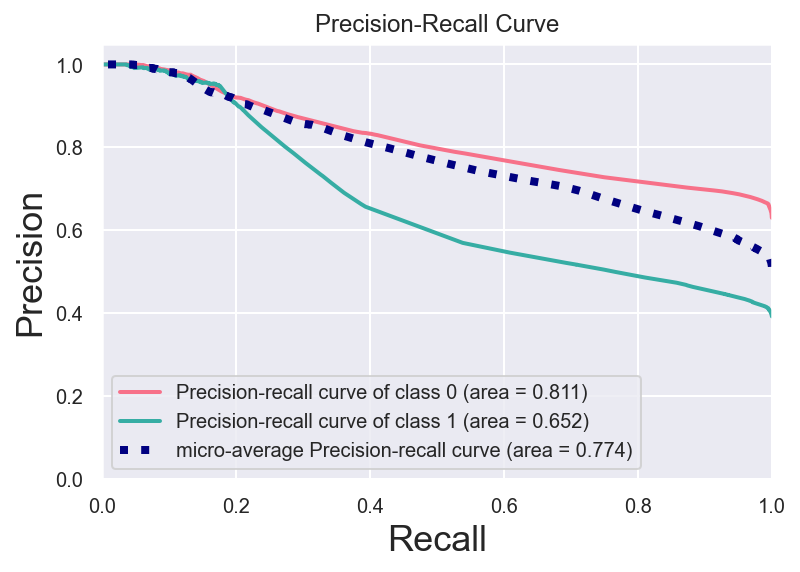

In [43]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(rfc.classes_)))
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show();
#plt.savefig("nlpprcurve.png", bbox_inches='tight')

This Precision recall curve shows the trade off between precision and recall for different threshold. It measures how successful prediction is when classes are very imbalanced. A high area under the curve represents both high recall and high precision, where high precision indicate a low false positive rate and a high recall indicate low false negative rate. The graph shows very high AUC scores, confirming the model can be trusted in predicting tree condition based on the majority of the predictors chosen for the model.

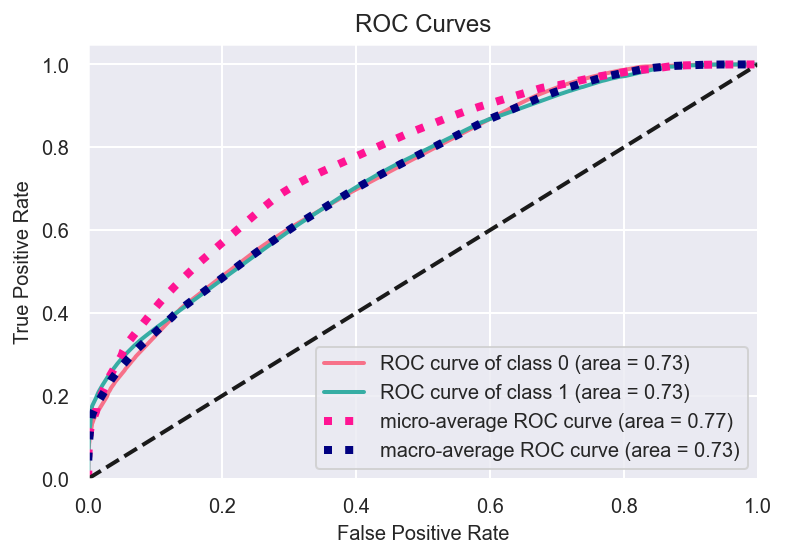

<Figure size 432x288 with 0 Axes>

In [44]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()
plt.savefig("nlproc.png", bbox_inches='tight')

The receiver operating characteristic curve is another evaluation tool to see the performance of binary classification algorithms. It provides a graphical overall representation of classifier as a whole rather than a single value. Similar like with the graph above, the higher area under the curve, higher AUC score the better classifier performs.

### Creating Word Cloud using Tfidf Vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tf_trigrams = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tf_trigrams.fit(X1)
trigrams_tf = tf_trigrams.transform(X1)
trigrams_df = pd.DataFrame(trigrams_tf.todense(), columns=tf_trigrams.get_feature_names())
trigrams_df.sum().sort_values(ascending=False).head(30)


chin       10416.040066
pin         8063.714797
el          4118.682895
tom         2776.699500
lm          2653.635381
blm         1775.059936
omd         1530.508910
old         1455.120864
lam         1386.905034
cuc          980.870004
minor        947.061103
wm           873.786011
bm           800.065489
ditto        721.858774
loph         515.945191
tor          260.173716
crown        252.285586
tree         248.848897
bc           243.047142
lammas       226.874195
vis          224.107358
bt           217.245768
poor         212.712716
rolling      200.604878
dead         193.640034
oel          192.175969
bnc          178.978074
form         178.893538
new          171.818490
cp           171.594232
dtype: float64

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


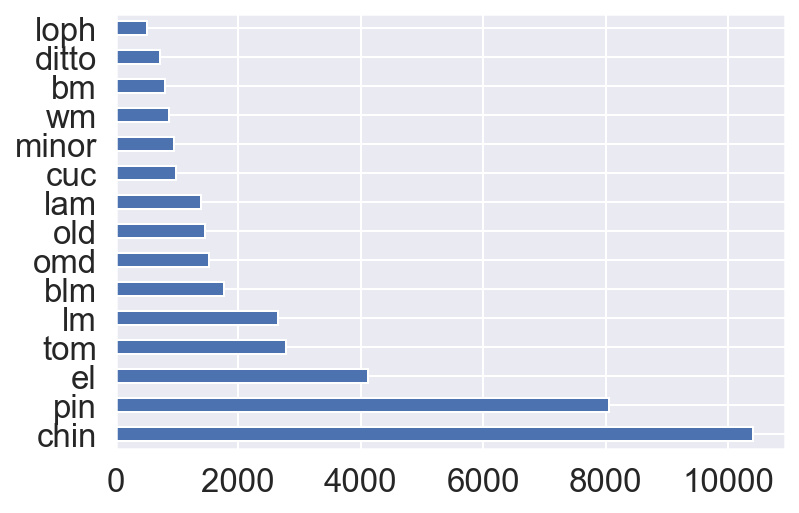

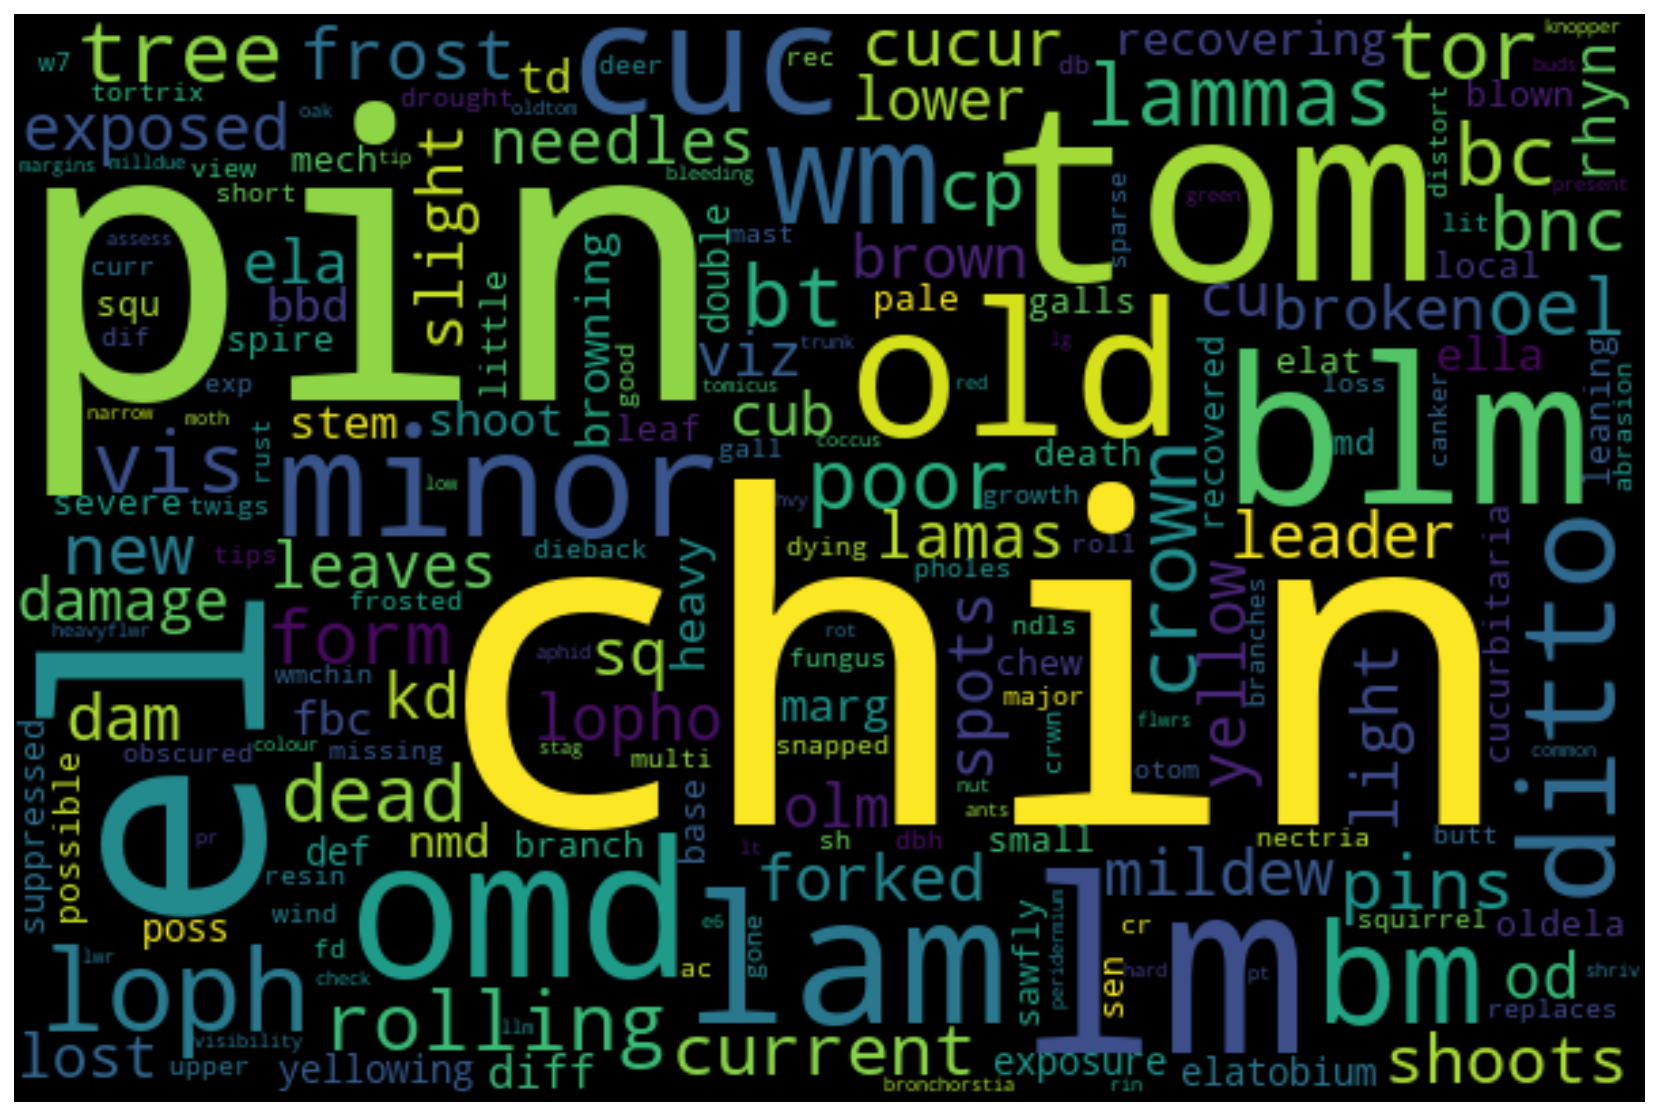

In [48]:
top_texts3 = trigrams_df.sum().sort_values(ascending=False)
top_texts3.head(15).plot(kind='barh')# Create and generate a word cloud image:
Cloud = WordCloud( width = 600, height = 400, 
                background_color ='black',
                stopwords = 'English', 
                min_font_size = 3,
                min_word_length=0).generate_from_frequencies(top_texts3) 

# Display the generated image:
plt.figure(figsize=[15,10])
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()